# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.cluster import KMeans

# Loading Dataset

In [2]:
ds=pd.read_excel('Online Retail.xlsx',parse_dates=['InvoiceDate'])
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Checking whether the InvoiceNo Column is in the form of String

In [4]:
ds['InvoiceNo']=ds['InvoiceNo'].astype('str')

In [5]:
ds.sort_values('InvoiceNo',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


### InvoiceNo that starts with the letter 'C' indicates a canceled transaction. Will delete this data, because we will analyze only successful transactions

In [6]:
ds=ds[~ds['InvoiceNo'].str.contains('C')]
def findingmissingvalue(data):
    missing_value=data.isnull().sum(axis = 0).reset_index()
    missing_value.columns=['variable','number_of_missing']
    missing_value['percentage_of_missing']=(missing_value['number_of_missing'])/data.shape[0]*100 
    mv=missing_value.sort_values('percentage_of_missing',ascending = False).reset_index(drop=True)
    return mv
findingmissingvalue(ds)

,variable,number_of_missing,percentage_of_missing
0,CustomerID,134697,25.289465
1,Description,1454,0.272990
2,InvoiceNo,0,0.000000
3,StockCode,0,0.000000
4,Quantity,0,0.000000
5,InvoiceDate,0,0.000000
6,UnitPrice,0,0.000000
7,Country,0,0.000000


### We have missing values in the CustomerID and Description columns. Because the data is large, dropping the missing values will not cause a problem in data size. Additionally, CustomerlD and Description can not be filled because it will affect the analysis later

In [7]:
ds=ds.dropna(subset=['CustomerID','Description'])
findingmissingvalue(ds)

,variable,number_of_missing,percentage_of_missing
0,InvoiceNo,0,0.0
1,StockCode,0,0.0
2,Description,0,0.0
3,Quantity,0,0.0
4,InvoiceDate,0,0.0
5,UnitPrice,0,0.0
6,CustomerID,0,0.0
7,Country,0,0.0


In [8]:
ds['Description']=ds['Description'].str.strip()
ds['CustomerID']=ds['CustomerID'].astype('int')
ds.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


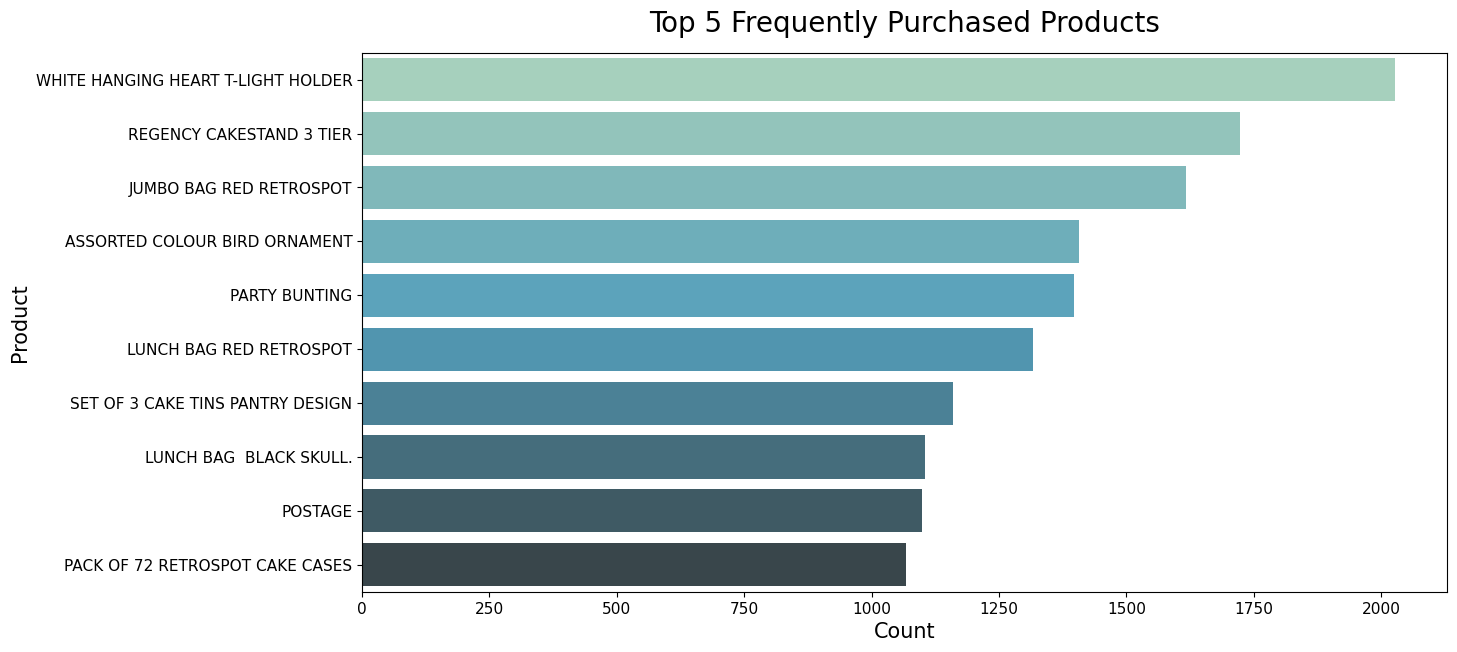

In [9]:
plt.figure(figsize=(14,7))
ax = sns.countplot(y=ds['Description'], 
 order=ds["Description"].value_counts().iloc[:10].index, 
 palette="GnBu_d")
ax.set_title("Top 5 Frequently Purchased Products",size=20,pad=15)
ax.set_xlabel("Count",size=15)
ax.set_ylabel("Product",size=15)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()

In [10]:
ds['TotalPrice']=ds['Quantity']*ds['UnitPrice']
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### 5 customers who spend the most money on Online Retail

In [11]:
price_cust=pd.pivot_table(ds,index='CustomerID',values='TotalPrice',aggfunc=np.sum)
price_cust.sort_values('TotalPrice',ascending=False)[:5]

,TotalPrice
CustomerID,
14646,280206.02
18102,259657.30
17450,194550.79
16446,168472.50
14911,143825.06


### 5 customers who most frequently shop at Online Retail

In [12]:
order_cust=pd.pivot_table(ds,index='CustomerID',values='InvoiceNo',aggfunc=pd.Series.nunique)
order_cust.sort_values('InvoiceNo',ascending=False)[:5]

,InvoiceNo
CustomerID,
12748,210
14911,201
17841,124
13089,97
14606,93


### Time Cohorts
####  Retrieve the InvoiceMonth data

In [13]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)
ds['InvoiceMonth']=ds['InvoiceDate'].apply(get_month)
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


### Create a CohortMonth, which is the time when customers first shop

In [14]:
group=ds.groupby('CustomerID')['InvoiceMonth']
ds['CohortMonth']=group.transform('min')
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01


### Difference in years and months

In [15]:
def date(data, column):
    year=data[column].dt.year
    month=data[column].dt.month
    day=data[column].dt.day
    return year, month, day
invoice_year,invoice_month, _=date(ds,'InvoiceMonth')
cohort_year,cohort_month, _=date(ds,'CohortMonth')
diff_year=invoice_year-cohort_year
diff_month=invoice_month-cohort_month

#### The IndexTime column describes the month difference between the first purchase and the purchase on InvoiceMonth. An addition is made by 1 so that the first month is counted as 1, not 0

In [16]:
ds['IndexTime']=diff_year*12+diff_month+1
count_cohort_time=ds.groupby(['CohortMonth','IndexTime'])['CustomerID'].apply(pd.Series.nunique)
count_cohort_time=count_cohort_time.reset_index()
cohort_time_table=count_cohort_time.pivot(index='CohortMonth',columns='IndexTime',values='CustomerID')
cohort_time_table

IndexTime,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Customer Retention Rate

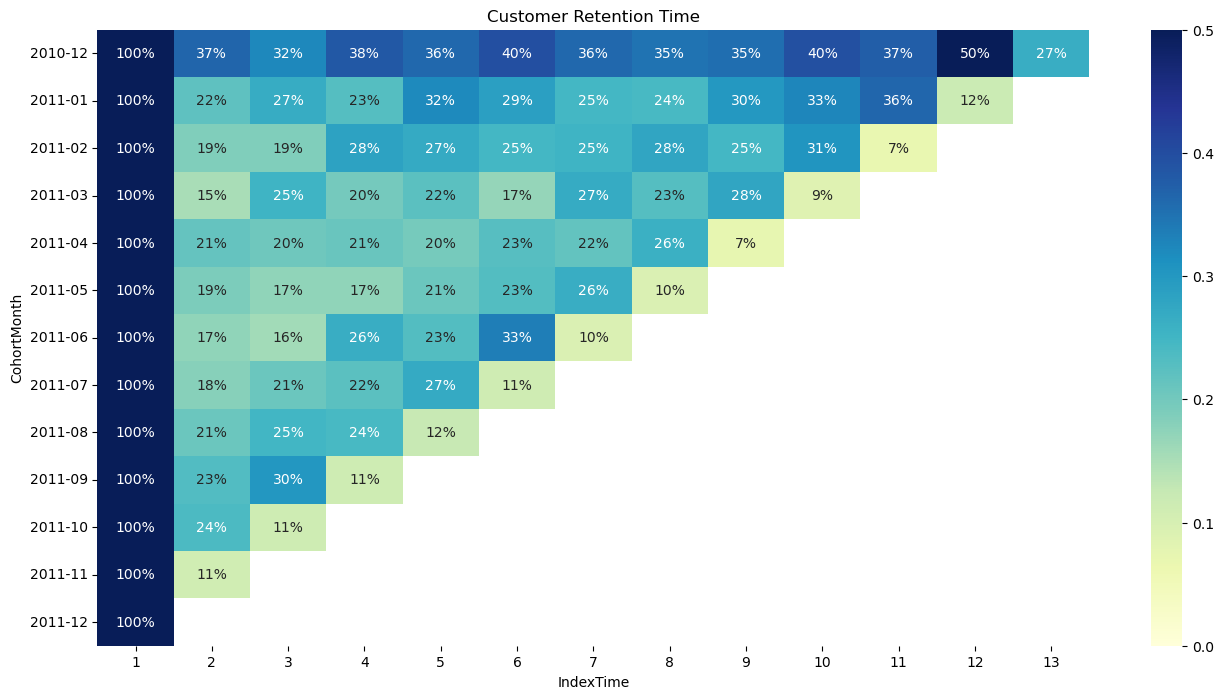

In [17]:
cohort_size=cohort_time_table.iloc[:,0]
retention=cohort_time_table.divide(cohort_size,axis=0)
retention.index=retention.index.strftime('%Y-%m')
plt.figure(figsize=(16,8))
ax=sns.heatmap(data=retention,annot=True,annot_kws={"size":10},vmin=0.0,vmax=0.5,fmt='.0%',cmap='YlGnBu')
plt.title('Customer Retention Time')
plt.show()

### On average, the number of customers that online retail has successfully retained is less than 50%

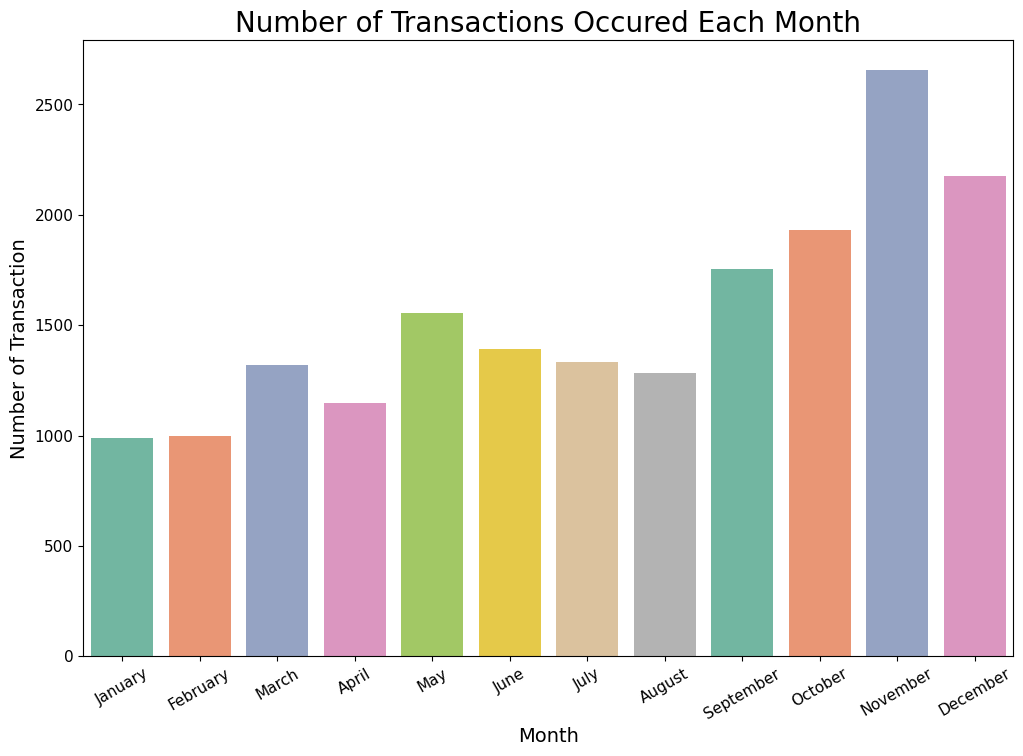

In [18]:
order_month=ds.groupby(ds['InvoiceDate'].dt.month)['InvoiceNo'].nunique()
plt.figure(figsize=(12,8))
ax=sns.barplot(x='InvoiceDate',y='InvoiceNo',data=order_month.reset_index(),palette = "Set2")
ax.set_title('Number of Transactions Occured Each Month',size=20)
ax.set_xlabel('Month',size=14)
ax.set_ylabel('Number of Transaction',size=14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'], rotation = 30)
plt.show()

### Recency, Frequency, Monetary (RFM)

In [19]:
print('Min: {}\nMax: {}'.format(min(ds['InvoiceDate']),max(ds['InvoiceDate'])))
analysis_date=max(ds['InvoiceDate'])+dt.timedelta(days=1)
print((analysis_date).date())

Min: 2010-12-01 08:26:00
Max: 2011-12-09 12:50:00
2011-12-10


In [20]:
rfm_customer=ds.groupby('CustomerID').agg({'InvoiceDate': lambda x: (analysis_date-x.max()).days, 'InvoiceNo': 'count', 'TotalPrice': 'sum'})
rfm_customer.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'Monetary'},inplace = True)
rfm_customer

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


### RFM quartile

In [21]:
r_labels=range(1,5) 
f_labels=range(4,0,-1) 
m_labels=range(4,0,-1)
r_quartiles=pd.qcut(rfm_customer['Recency'],q=4,labels=r_labels)
f_quartiles=pd.qcut(rfm_customer['Frequency'],q=4,labels=f_labels)
m_quartiles=pd.qcut(rfm_customer['Monetary'],q=4,labels=m_labels)
rfm_customer=rfm_customer.assign(R=r_quartiles.values,F=f_quartiles.values,M=m_quartiles.values)
rfm_customer

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,326,1,77183.60,4,4,1
12347,2,182,4310.00,1,1,1
12348,75,31,1797.24,3,3,1
12349,19,73,1757.55,2,2,1
12350,310,17,334.40,4,4,3
...,...,...,...,...,...,...
18280,278,10,180.60,4,4,4
18281,181,7,80.82,4,4,4
18282,8,12,178.05,1,4,4


In [22]:
def join_rfm(x):
    return str(x['R'])+str(x['F'])+str(x['M'])
rfm_customer['RFM_Segment']=rfm_customer.apply(join_rfm,axis=1)
rfm_customer['RFM_Score']=rfm_customer[['R', 'F', 'M']].sum(axis=1)
rfm_customer.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,4,4,1,4.04.01.0,9
12347,2,182,4310.00,1,1,1,1.01.01.0,3
12348,75,31,1797.24,3,3,1,3.03.01.0,7
12349,19,73,1757.55,2,2,1,2.02.01.0,5
12350,310,17,334.40,4,4,3,4.04.03.0,11


In [23]:
rfm_customer.groupby('RFM_Segment').size().sort_values(ascending=False)

RFM_Segment
1.01.01.0    447
4.04.04.0    384
2.01.01.0    217
4.03.03.0    206
3.04.04.0    179
            ... 
2.04.01.0      7
1.04.01.0      6
4.03.01.0      5
4.01.03.0      4
1.01.04.0      3
Length: 61, dtype: int64

### Summary metrics for each RFM Score

In [24]:
rfm_customer.groupby('RFM_Score').agg({'Recency':'mean', 'Frequency':'mean', 'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3             7.3     374.5   9319.2   447
4            21.1     187.7   4083.2   392
5            32.1     112.3   2049.4   426
6            46.0      80.0   1801.4   417
7            64.6      56.8    994.1   454
8            79.1      38.5    755.5   459
9            96.3      27.9    824.0   461
10          154.3      21.4    368.5   516
11          175.7      13.6    239.6   383
12          260.8       8.2    158.9   384

In [25]:
loyalty_level=['Platinum','Gold','Silver','Bronze']
loyalty_quartile=pd.qcut(rfm_customer['RFM_Score'],q=4, labels=loyalty_level)
rfm_customer['Loyalty_Level']=loyalty_quartile.values
rfm_customer

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Loyalty_Level
CustomerID,,,,,,,,,
12346,326,1,77183.60,4,4,1,4.04.01.0,9,Silver
12347,2,182,4310.00,1,1,1,1.01.01.0,3,Platinum
12348,75,31,1797.24,3,3,1,3.03.01.0,7,Gold
12349,19,73,1757.55,2,2,1,2.02.01.0,5,Platinum
12350,310,17,334.40,4,4,3,4.04.03.0,11,Bronze
...,...,...,...,...,...,...,...,...,...
18280,278,10,180.60,4,4,4,4.04.04.0,12,Bronze
18281,181,7,80.82,4,4,4,4.04.04.0,12,Bronze
18282,8,12,178.05,1,4,4,1.04.04.0,9,Silver


In [26]:
rfm_customer.groupby('Loyalty_Level').agg({'Recency':'mean', 'Frequency':'mean', 'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
                 mean      mean     mean count
Loyalty_Level                                 
Platinum         19.9     228.3   5248.5  1265
Gold             63.8      57.8   1164.9  1330
Silver          127.0      24.5    583.4   977
Bronze          218.3      10.9    199.2   767

### Key k-means assumptions
1. Symmetric distribution of variables (not skewed)
2. Variables with same average values
3. Variables with same variance

In [27]:
def rfm_dist(column):
    r_skew=rfm_customer[column].skew() 
    plt.rcParams['font.size']=13
    plt.figure(figsize=(10,6))
    sns.distplot(rfm_customer[column],color='tomato',kde_kws={"color": "k"})
    plt.title('{} Distribution'.format(column))
    plt.show()
    print('Skewness value of data {}: {}'.format(column,r_skew))

C:\Users\jahna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


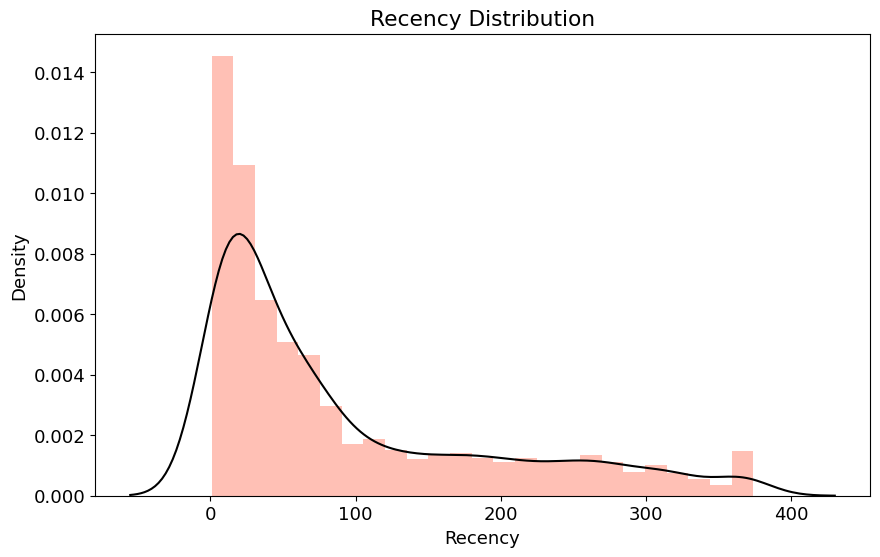

Skewness value of data Recency: 1.2463568823921845


In [28]:
rfm_dist('Recency')

C:\Users\jahna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


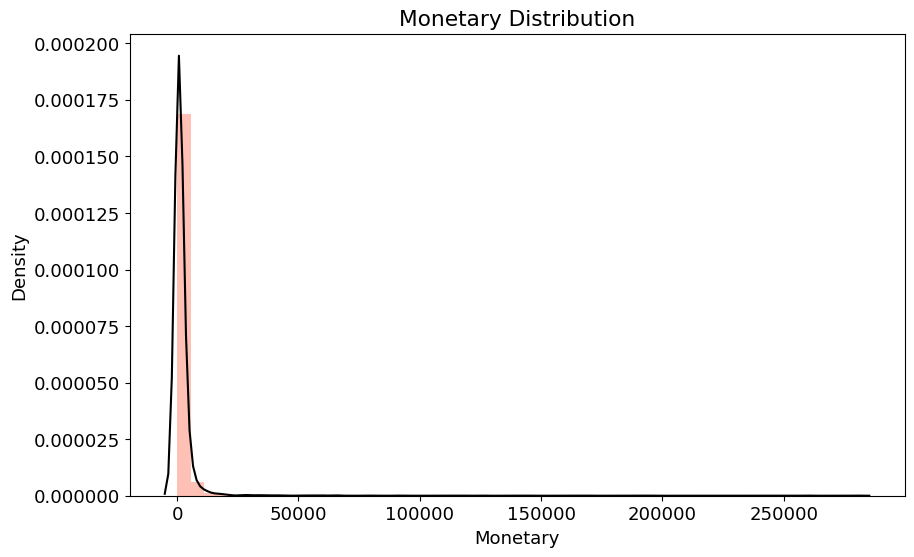

Skewness value of data Monetary: 19.326985305561823


In [29]:
rfm_dist('Monetary')

C:\Users\jahna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


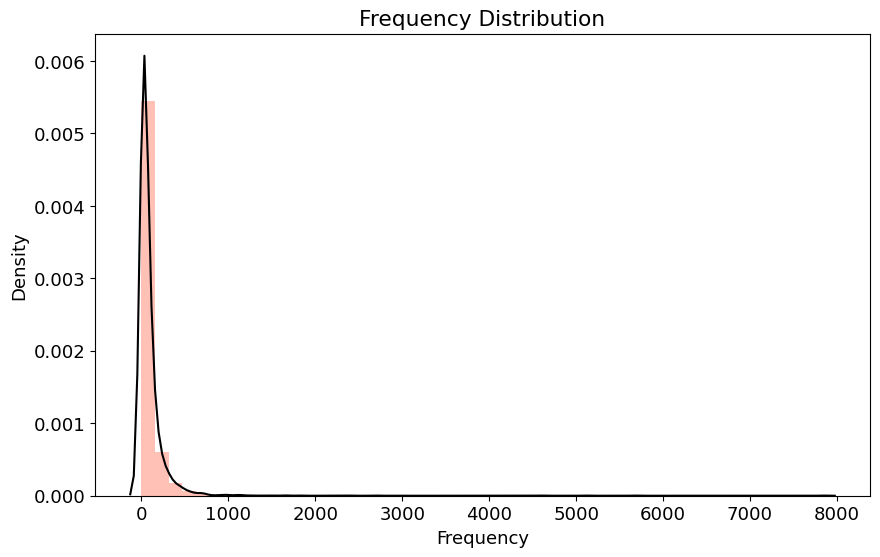

Skewness value of data Frequency: 18.106242903118684


In [30]:
rfm_dist('Frequency')

In [31]:
print('\nRecency : {}'.format(rfm_customer['Recency'].skew()),
      '\nFrequency : {}'.format(rfm_customer['Frequency'].skew()),
      '\nMonetary : {}'.format(rfm_customer['Monetary'].skew()))


Recency : 1.2463568823921845 
Frequency : 18.106242903118684 
Monetary : 19.326985305561823


As a general rule of thumb:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively 
skewed), the data are moderately skewed.
If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data 
are highly skewed.

From the general rule of thumb, it can be concluded that data Recency, Frequency, and 
Monetary are highly positive skew. So, the data must be transformed (Data Transformation) to 
make it into a normal distribution.

In [32]:
rfm_normalise=rfm_customer[['Recency','Frequency','Monetary']]

In [33]:
rfm_normalise.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.518322,91.708689,2053.793018
std,100.009747,228.792852,8988.248381
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,307.245000
50%,51.000000,41.000000,674.450000
75%,142.000000,100.000000,1661.640000
max,374.000000,7847.000000,280206.020000


In [34]:
power=PowerTransformer().fit(rfm_normalise)
rfm_transform=power.transform(rfm_normalise)
scaler=StandardScaler().fit(rfm_transform)
rfm_transform=scaler.transform(rfm_transform)
rfm_transform=pd.DataFrame(rfm_transform,index=rfm_normalise.index,columns=rfm_normalise.columns)
print('These are the mean values after data transformation:')
rfm_transform.describe()

These are the mean values after data transformation:


,Recency,Frequency,Monetary
count,4.339000e+03,4.339000e+03,4.339000e+03
mean,-6.562444e-17,-3.149768e-17,-1.358673e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-2.023615e+00,-2.420116e+00,-6.771115e+00
25%,-7.262454e-01,-6.778752e-01,-6.640781e-01
50%,-7.919785e-04,-1.754355e-03,-1.423703e-02
75%,8.380272e-01,7.009493e-01,6.862765e-01
max,1.755177e+00,4.225204e+00,3.885827e+00


In [35]:
def rfm_dist_transform(column):
    r_skew_transform=rfm_transform[column].skew()
    plt.rcParams['font.size']=13
    plt.figure(figsize=(10,6))
    sns.distplot(rfm_transform[column], color = 'g',kde_kws={"color": "k"})
    plt.title('{} Distribution after Data Transformation'.format(column))
    plt.show()
    print('Skewness value of data {} after data transformation: {}'.format(column,r_skew_transform))

C:\Users\jahna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


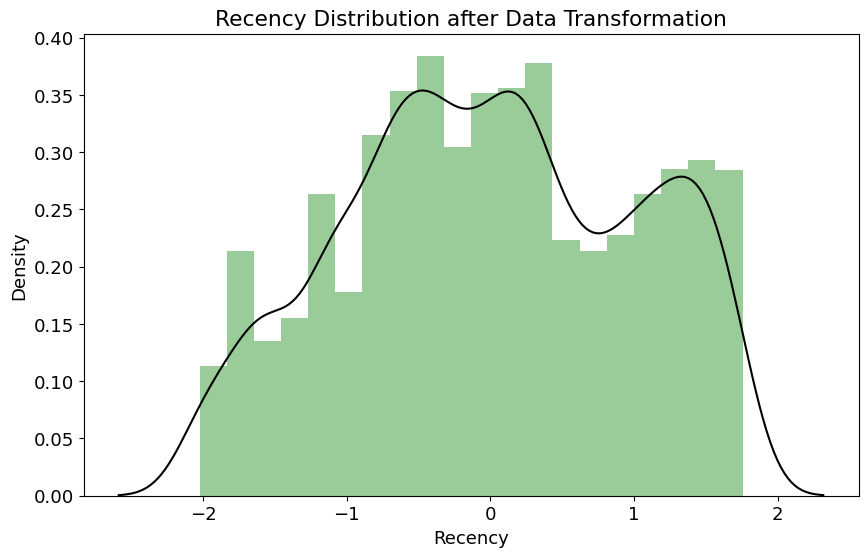

Skewness value of data Recency after data transformation: -0.05649210191594951


In [36]:
rfm_dist_transform('Recency')

C:\Users\jahna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


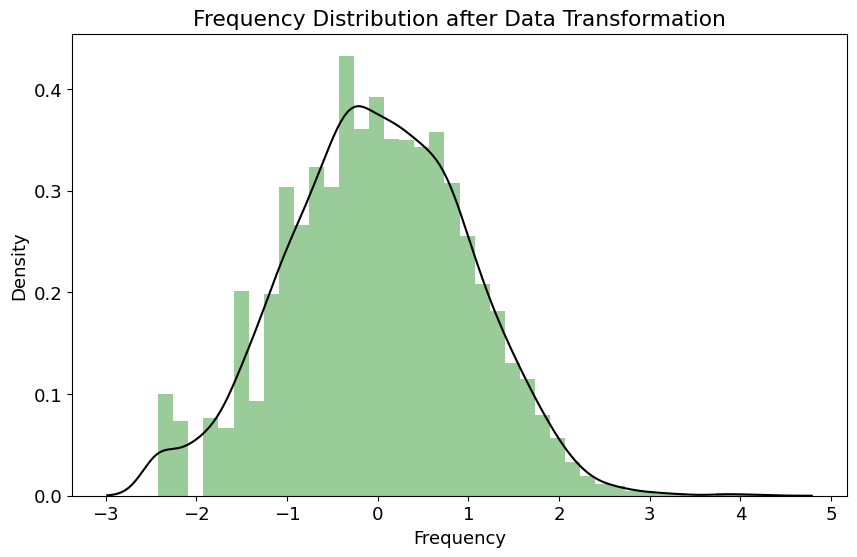

Skewness value of data Frequency after data transformation: -0.00010277002306379692


In [37]:
rfm_dist_transform('Frequency')

C:\Users\jahna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


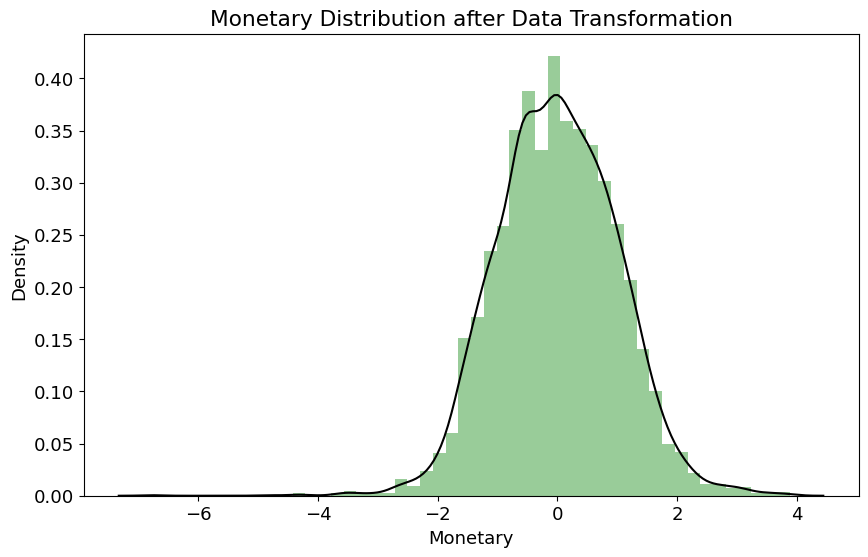

Skewness value of data Monetary after data transformation: -0.022753337015751482


In [38]:
rfm_dist_transform('Monetary')

In [39]:
print('\nRecency : {}'.format(rfm_transform['Recency'].skew()), '\nFrequency : {}'.format(rfm_transform['Frequency'].skew()), '\nMonetary : {}'.format(rfm_transform['Monetary'].skew()))


Recency : -0.05649210191594951 
Frequency : -0.00010277002306379692 
Monetary : -0.022753337015751482


### Determining the number of clusters
#### Elbow Method

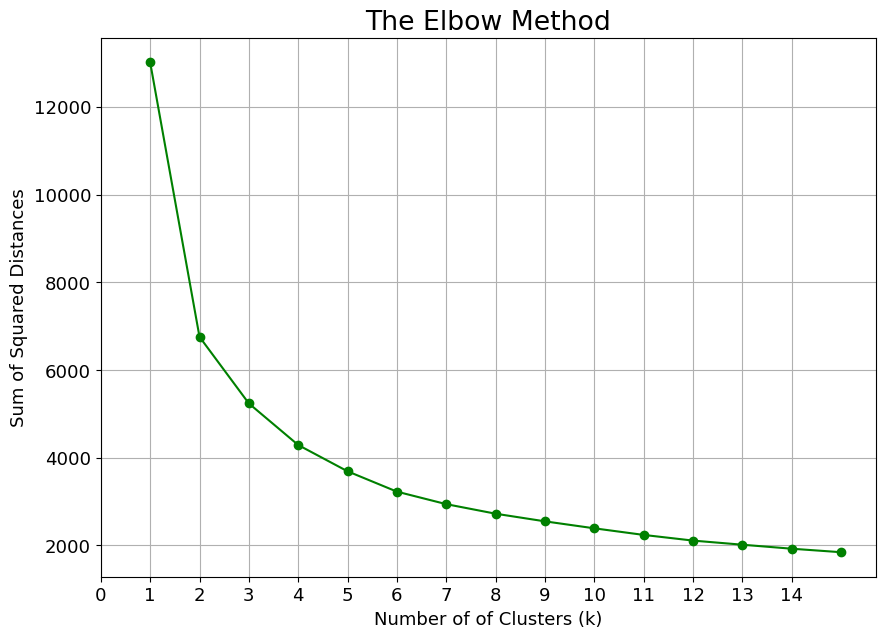

In [40]:
inertia=[]
cl=15
for i in range(1,cl+1):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(rfm_transform)
    inertia.append(kmeans.inertia_)
fig,ax=plt.subplots()
fig.set_size_inches(10, 7)
plt.rcParams['font.size']=16
plt.plot(range(1,cl+1), inertia,'o-',color='g')
plt.xticks(np.arange(0,15,1.0))
plt.title('The Elbow Method')
plt.xlabel('Number of of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

In [41]:
n=4
model=KMeans(n_clusters=n,init='k-means++',max_iter=300,n_init=10,random_state=0)
model_kmeans=model.fit(rfm_transform)
labels=model_kmeans.labels_
centers=model_kmeans.cluster_centers_
rfm_customer['Cluster']=labels
clusters_seg=pd.DataFrame(rfm_transform,columns=['Recency','Frequency','Monetary'])
clusters_seg['Cluster']=labels+1
clusters=[]
for i in range(0,n):
    clusters.append(rfm_customer[rfm_customer['Cluster']==i])
    values = power.inverse_transform(scaler.inverse_transform(centers))
for i in range(0,n):
    print('-----CLUSTER {}-----'.format(i+1))
    print('Number of Customers: {}'.format(clusters[i].shape[0]))
    print('(Recency)Last Day Shopping: {:4.0f}'.format(values[i][0]))
    print('(Frec)Purchases Frequency : {:4.0f}'.format(values[i][1]))
    print('(Monetary)Total purchases: £{:6.2f}\n'.format(values[i][2]))

-----CLUSTER 1-----
Number of Customers: 962
(Recency)Last Day Shopping:   24
(Frec)Purchases Frequency :   21
(Monetary)Total purchases: £347.56

-----CLUSTER 2-----
Number of Customers: 1195
(Recency)Last Day Shopping:   78
(Frec)Purchases Frequency :   62
(Monetary)Total purchases: £1069.15

-----CLUSTER 3-----
Number of Customers: 1067
(Recency)Last Day Shopping:   10
(Frec)Purchases Frequency :  171
(Monetary)Total purchases: £2979.90

-----CLUSTER 4-----
Number of Customers: 1115
(Recency)Last Day Shopping:  199
(Frec)Purchases Frequency :   11
(Monetary)Total purchases: £217.98



C:\Users\jahna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\jahna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\jahna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\jahna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [42]:
rfm_transform['Cluster']=model_kmeans.labels_
rfm_transform.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,1.617262,-2.420116,3.193082,1
12347,-1.818927,1.178407,1.377477,2
12348,0.300127,-0.219010,0.745038,1
12349,-0.691692,0.451547,0.728345,2
12350,1.567401,-0.677875,-0.592290,3


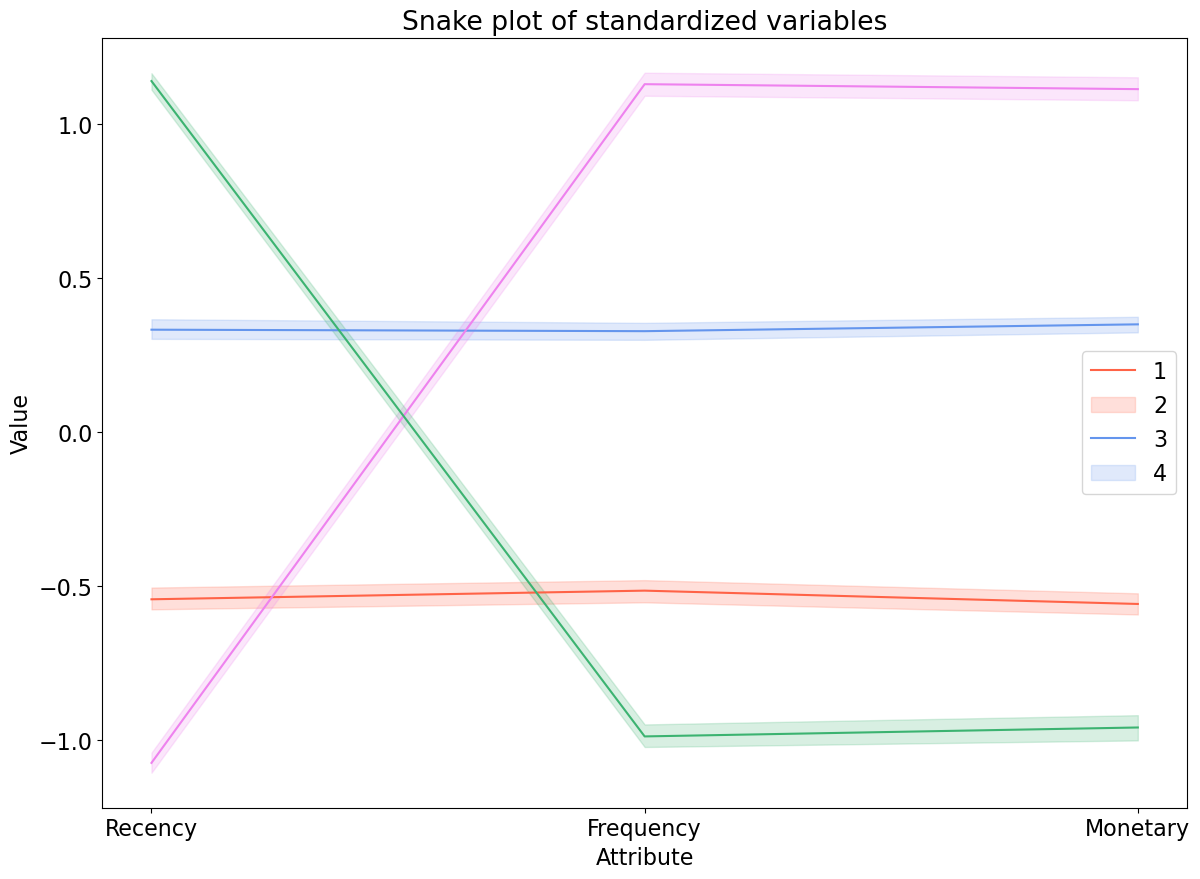

In [43]:
data_melt=pd.melt(rfm_transform.reset_index(),id_vars=['CustomerID','Cluster'], 
value_vars=['Recency','Frequency','Monetary'], var_name='Attribute', value_name='Value')
plt.figure(figsize=(14,10))
plt.title('Snake plot of standardized variables')
ax = sns.lineplot(x='Attribute', y='Value', 
hue='Cluster',palette=['tomato','cornflowerblue','violet','mediumseagreen'], data=data_melt, 
sort=False)
ax.legend(['1','2','3','4'])
plt.show()

C:\Users\jahna\AppData\Local\Temp\ipykernel_18012\2876745206.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


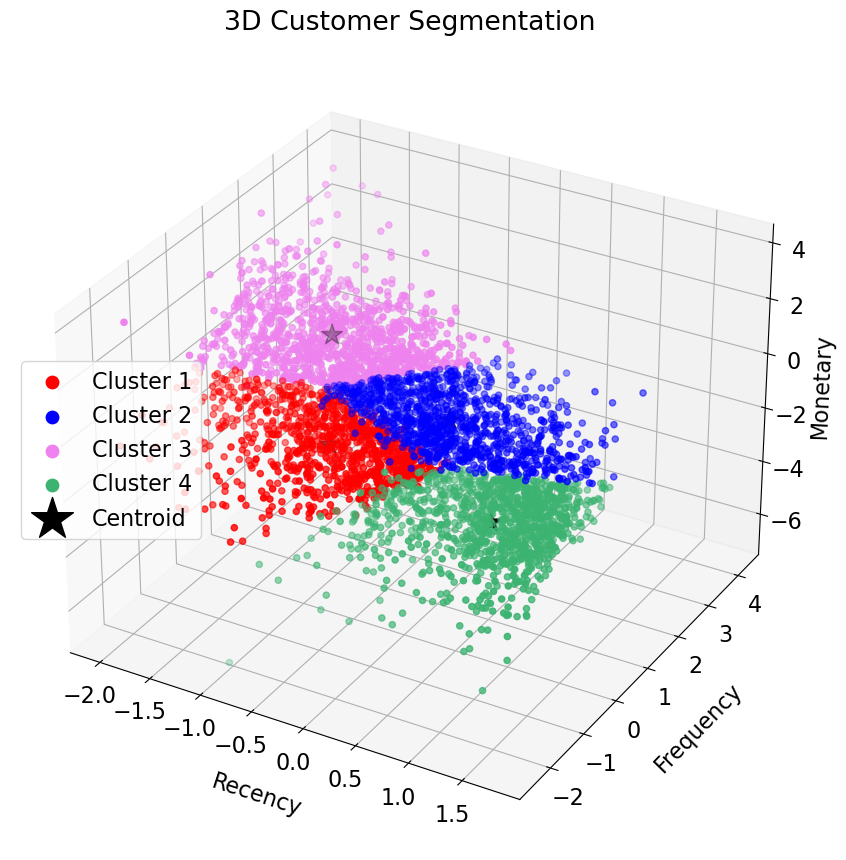

In [44]:
fig=plt.figure(figsize=(16,8))
ax=Axes3D(fig)
ax.scatter(rfm_transform[rfm_transform['Cluster']==0]['Recency'],rfm_transform[rfm_transform['Cluster']==0]['Frequency'],rfm_transform[rfm_transform['Cluster']==0]['Monetary'],color='red', label='Cluster 1')
ax.scatter(rfm_transform[rfm_transform['Cluster']==1]['Recency'],rfm_transform[rfm_transform['Cluster']==1]['Frequency'],rfm_transform[rfm_transform['Cluster']==1]['Monetary'],color='blue', label='Cluster 2')
ax.scatter(rfm_transform[rfm_transform['Cluster']==2]['Recency'],rfm_transform[rfm_transform['Cluster']==2]['Frequency'],rfm_transform[rfm_transform['Cluster']==2]['Monetary'],color='violet', label='Cluster 3')
ax.scatter(rfm_transform[rfm_transform['Cluster']==3]['Recency'],rfm_transform[rfm_transform['Cluster']==3]['Frequency'],rfm_transform[rfm_transform['Cluster']==3]['Monetary'],color='mediumseagreen', label='Cluster 4')
ax.scatter(centers[:,0],centers[:,1],centers[:,2],s=250,c='k',marker='*',label='Centroid')
plt.legend(loc='center left',markerscale=2)
plt.title('3D Customer Segmentation',pad=15)
ax.set_xlabel('Recency',labelpad=15)
ax.set_ylabel('Frequency',labelpad=15)
ax.set_zlabel('Monetary')
plt.show()

In [45]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
print('Top 5 Country in Online Retail:')
ds['Country'].value_counts()[:5]

Top 5 Country in Online Retail:


United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: Country, dtype: int64

In [48]:
ds=ds[ds['Country']=='United Kingdom']
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,IndexTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [49]:
basket=ds.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets=basket.applymap(encode_units)
basket_sets.drop('POSTAGE', axis = 1, inplace = True)
frequent_itemset=apriori(basket_sets,min_support = 0.02,use_colnames=True)
rule=association_rules(frequent_itemset,metric="lift",min_threshold=1)
rule.sort_values('support',ascending=False)

C:\Users\jahna\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.086912,0.048772,0.030392,0.349689,7.169917,0.026153,1.462728,0.942438
13,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.048772,0.086912,0.030392,0.623153,7.169917,0.026153,2.422965,0.904650
27,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.067271,0.059823,0.029071,0.432143,7.223641,0.025046,1.655657,0.923704
26,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.059823,0.067271,0.029071,0.485944,7.223641,0.025046,1.814449,0.916387
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.040723,0.036759,0.028590,0.702065,19.099148,0.027093,3.233057,0.987871
...,...,...,...,...,...,...,...,...,...,...
45,(LUNCH BAG SPACEBOY DESIGN),(LUNCH BAG PINK POLKADOT),0.052436,0.050934,0.020061,0.382589,7.511463,0.017391,1.537170,0.914840
32,(LUNCH BAG APPLE DESIGN),(LUNCH BAG RED RETROSPOT),0.044807,0.067271,0.020001,0.446381,6.635529,0.016987,1.684784,0.889136
33,(LUNCH BAG RED RETROSPOT),(LUNCH BAG APPLE DESIGN),0.067271,0.044807,0.020001,0.297321,6.635529,0.016987,1.359359,0.910550
46,(LUNCH BAG PINK POLKADOT),(LUNCH BAG SUKI DESIGN),0.050934,0.050213,0.020001,0.392689,7.820423,0.017444,1.563921,0.918935


In [51]:
rule[(rule['lift']>=6) &
 (rule['confidence']>=0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029611,0.036759,0.024266,0.819473,22.293137,0.023177,5.335706,0.984289
70,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.023004,0.036759,0.020482,0.890339,24.221015,0.019636,8.783841,0.981287
72,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.024266,0.040723,0.020482,0.844059,20.726763,0.019494,6.151553,0.975423
